In [1]:
import glob
import matplotlib as mpl
import matplotlib.colors 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.optimize as spopt
import scipy.stats as spstats

import populationevolution_v5 as popev

np.random.seed(42)
plt.style.use(('C:\\Users\\Nicholas Sherer\\.matplotlib\\Sherer_Thesis.mplstyle'))
%matplotlib inline

In [111]:
def logNbarplot(ax, pop):
    mu = pop.mutation_list.flatten()
    f = pop.fitness_list.flatten()
    N = pop.population_distribution
    xmesh, ymesh = np.meshgrid(np.arange(mu.size),-np.arange(f.size))
    xmesh = xmesh.ravel()
    ymesh = ymesh.ravel()
    logN = np.maximum(0,np.log(N.flatten()))
    bottom = np.zeros_like(logN)
    width=1
    depth=1
    ax.bar3d(xmesh, ymesh, bottom, width, depth, logN, shade=True);
    ax.view_init(elev = 45, azim=45);
    ax.set_xticklabels('{:2g}'.format(m) for m in mu);
    ax.set_yticks(-np.arange(f.size))
    ax.set_yticklabels(['{:2g}'.format(f_) for f_ in f], fontsize='medium')
    zticks = ax.get_zticks()
    ax.set_zticklabels('{0:.2g}'.format(np.exp(v)) for v in zticks)
    
def logNvsfplot(ax, pop):
    f_list = pop.fitness_list.flatten()
    N_f = np.sum(pop.population_distribution, axis=1)
    ind = np.arange(f_list.size,0,-1)
    ax.bar(ind, N_f, width=.95)
    ax.set_yscale('log')
    ax.set_xticks(ind[::2]);
    ax.set_xticklabels(['{:1g}'.format(f) for f in f_list][::2]);
    ax.set_xlabel('fitness, $f$', fontsize=32)
    ax.set_ylabel('$N(f)$', fontsize=32)
    
def logNvsmuplot(ax, pop):
    mu_list = pop.mutation_list.flatten()
    N_mu = np.sum(pop.population_distribution, axis=0)
    ind = np.arange(mu_list.size)
    ax.bar(ind, N_mu, width=.95)
    ax.set_yscale('log')
    ax.set_xticks(ind[::2]);
    ax.set_xticklabels(['{:1g}'.format(mu) for mu in mu_list][::2]);
    ax.set_xlabel('mutation rate, $\mu$', fontsize=32)
    ax.set_ylabel('$N(\mu)$', fontsize=32)

# Load Data

In [81]:
fbvary_results = []
for file in glob.glob('evolved_mu_f_b_vary?datetime.datetime(2019, 4, *).hdf5'):
    fbvary_results.append(popev.PopulationReader(file))

favary_results = []
for file in glob.glob('evolved_mu_f_a_vary?datetime.datetime(2019, 4, *).hdf5'):
    favary_results.append(popev.PopulationReader(file))

delta_f_vary_results = []
for file in glob.glob('evolved_mu_delta_f_vary?datetime.datetime(2019, 4, *).hdf5'):
    delta_f_vary_results.append(popev.PopulationReader(file))

# Graphs of population distribution and trajectories for base parameter set

In [ ]:
basepop = fbvary_results[5]
print('The parameters of the base population are delta_f: {},'
      ' M: {}, P_b: {}, P_a: {}, P_mu: {}, K: {}'.format(basepop.delta_fitness, basepop.mu_multiple,
                                                        basepop.fraction_beneficial, basepop.fraction_accurate,
                                                        ))

# Varying the probability of beneficial mutations

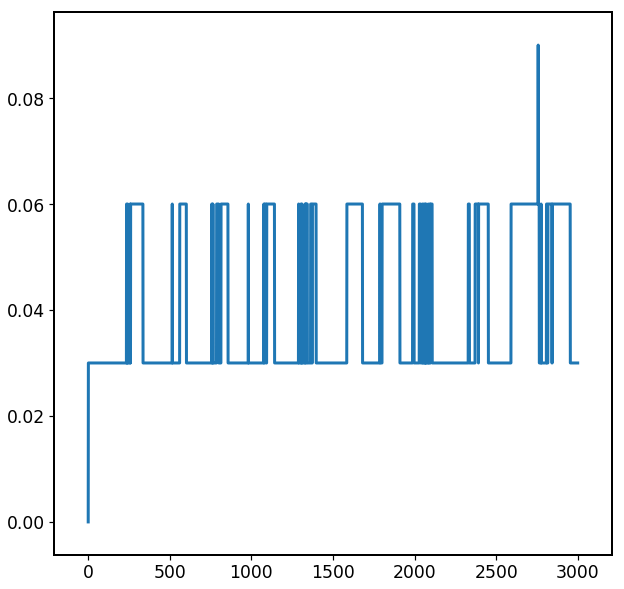

In [69]:
plt.figure(figsize=(10,10))
plt.plot(fbvary_results[5].max_fitness[:3000]-fbvary_results[5].mode_fitness[:3000], marker='')

E:\Anaconda3\envs\imageprocessing_windows\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


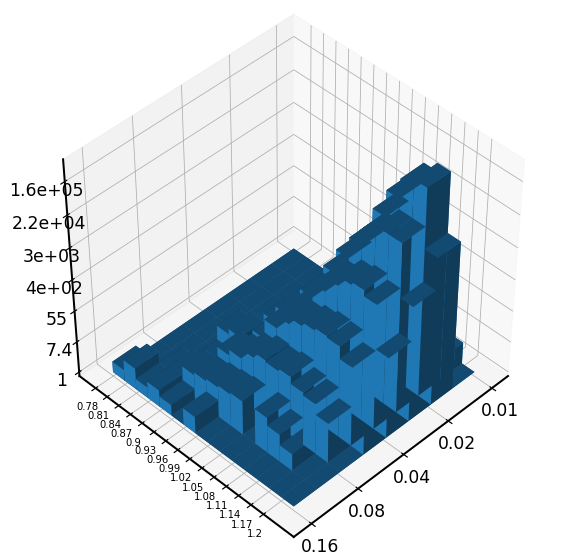

In [112]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
logNbarplot(ax, fbvary_results[5](10000))

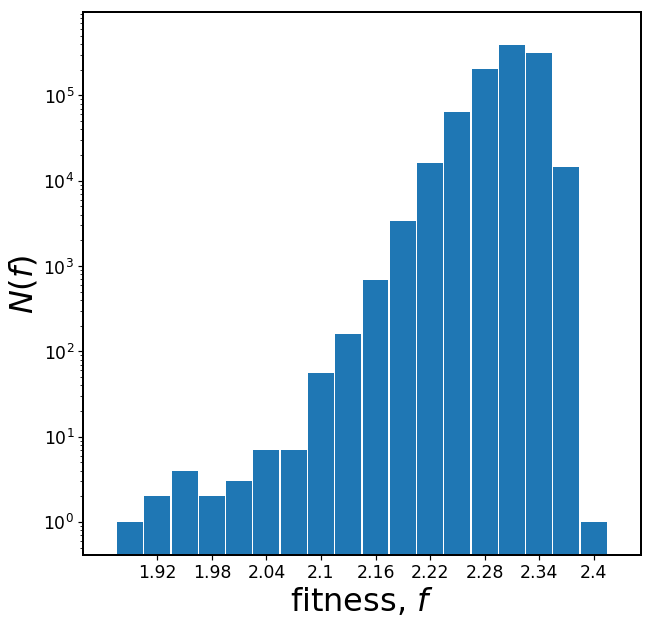

In [104]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
logNvsfplot(ax, fbvary_results[7](10000))

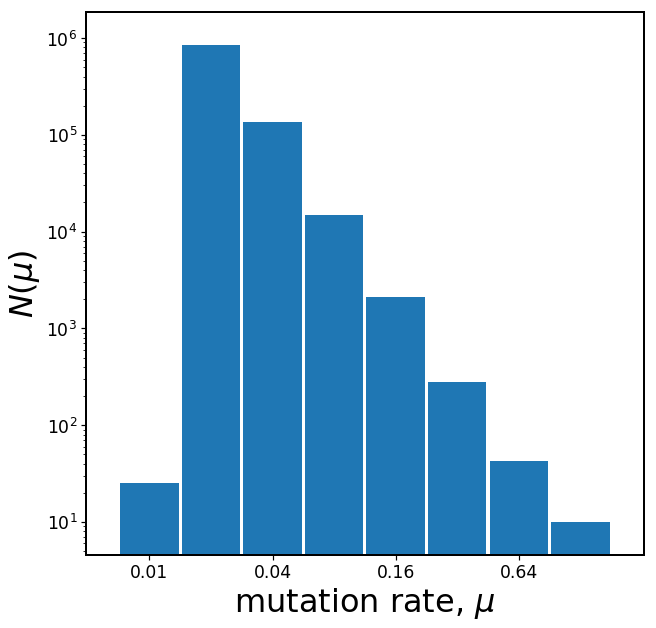

In [110]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
logNvsmuplot(ax, fbvary_results[7](10000))

# Varying the probability of accurate mutations

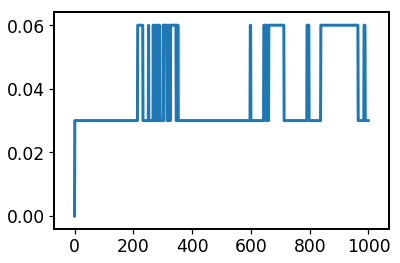

In [68]:
plt.plot(favary_results[0].max_fitness[:1000]-favary_results[0].mode_fitness[:1000], marker='')

# Varying $\Delta f$

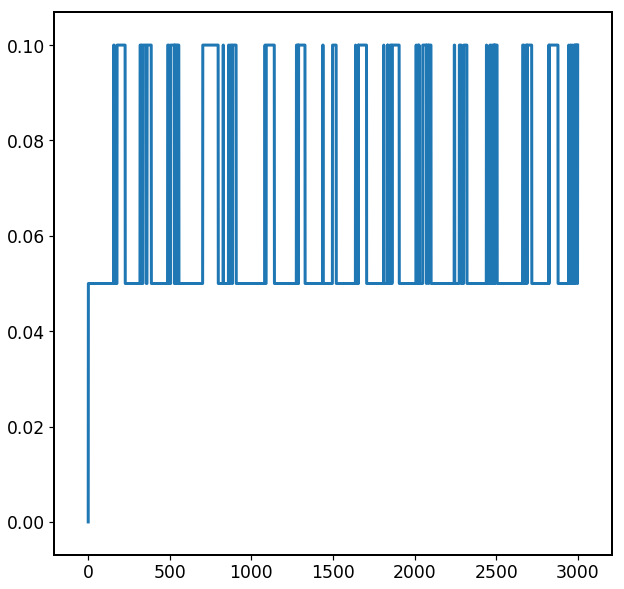

In [87]:
plt.figure(figsize=(10,10))
plt.plot(delta_f_vary_results[9].max_fitness[:3000]-delta_f_vary_results[9].mode_fitness[:3000], marker='')

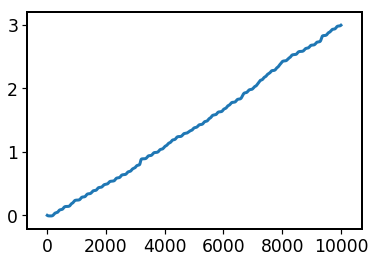

In [94]:
plt.plot(delta_f_vary_results[9].mean_fitness[:10**4], marker='')